Table of content 

 1. Import libraries
 2. Import dataset
 3. EDA and visualizations 
 4. Select features and scale features 
 5. train and test split
 6. Build, train, and evaluate Classifiers 
 
 
(KNeighborsClassifier, DecisionTreeClassifier & SVM)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
#import csv file
drug_data = pd.read_csv('drug200.csv')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
drug_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [4]:
drug_data.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [5]:
#check for missing values
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


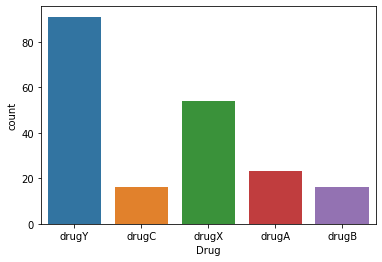

In [6]:
# Drug count
sns.countplot(drug_data["Drug"])
print(drug_data.Drug.value_counts())

<AxesSubplot:xlabel='Drug', ylabel='Age'>

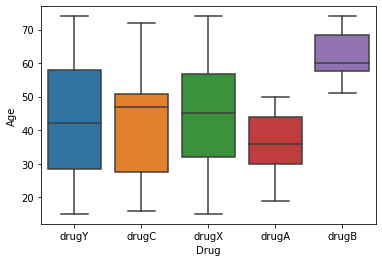

In [7]:
# drug type age range 
sns.boxplot(x="Drug", y="Age", data=drug_data)

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

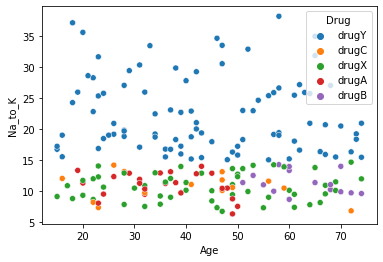

In [8]:
# 
sns.scatterplot(x = 'Age', y = 'Na_to_K', hue = "Drug", data = drug_data, alpha = 1)

        Cholesterol
HIGH            103
NORMAL           97


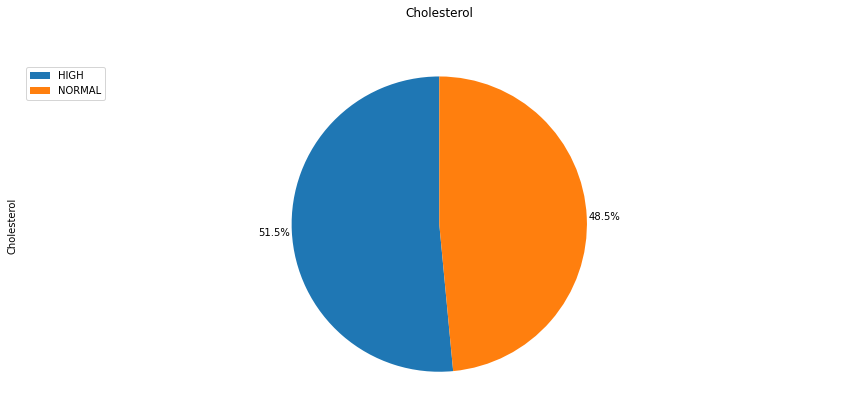

In [9]:
drug_c = drug_data['Cholesterol'].value_counts().to_frame()
print(drug_c)
drug_c['Cholesterol'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            labels=None,         
                            pctdistance=1.12,    
                            )

plt.title('Cholesterol', y=1.12) 
plt.axis('equal') 
plt.legend(labels=drug_c.index, loc='upper left') 
plt.show()

In [10]:
#select features and target
x = drug_data[['Age', 'Na_to_K']]
y = drug_data[['Drug']]

In [11]:
#scale features 
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [12]:
#split data to train and test subsets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

## KNeighborsClassifier Algorithm

In [13]:
# try and find the best parameters for 
# the svm model based on the given parameters 
# then fit on training subset
knn = KNeighborsClassifier()
p_g = {'n_neighbors': range(1,50)}
from sklearn.model_selection import GridSearchCV, cross_val_score
knngs = GridSearchCV(knn, p_g, cv=5)
knngs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [14]:
# best paramsters and score based on grid search 
print(knngs.best_params_)
print(knngs.best_score_)

{'n_neighbors': 12}
0.74


In [15]:
# another feature select 
XX = drug_data[['Sex', 'BP', 'Cholesterol','Age', 'Na_to_K']].values
y = drug_data[['Drug']].values

In [16]:
# Transforming non numerical labels into numerical labels
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
XX[:,0] = le_sex.transform(XX[:,0]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
XX[:,1] = le_BP.transform(XX[:,1])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
XX[:,2] = le_Chol.transform(XX[:,2]) 

XX[0:5]

array([[0, 0, 0, 23, 25.355],
       [1, 1, 0, 47, 13.093],
       [1, 1, 0, 47, 10.114],
       [0, 2, 0, 28, 7.798],
       [0, 1, 0, 61, 18.043]], dtype=object)

In [17]:
#scale features 
XX = preprocessing.StandardScaler().fit(XX).transform(XX.astype(float))
XX[0:5]

array([[-1.040833  , -1.11016894, -0.97043679, -1.29159102,  1.28652212],
       [ 0.96076892,  0.10979693, -0.97043679,  0.16269866, -0.4151454 ],
       [ 0.96076892,  0.10979693, -0.97043679,  0.16269866, -0.82855818],
       [-1.040833  ,  1.32976279, -0.97043679, -0.988614  , -1.14996267],
       [-1.040833  ,  0.10979693, -0.97043679,  1.0110343 ,  0.27179427]])

In [18]:
#split data to train and test subsets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(XX, y, test_size=0.25, random_state=1)

In [19]:
# shape of Train and Test set 
print('Train set:', X_trainset.shape, y_trainset.shape)
print('Test set:', X_testset.shape, y_testset.shape)

Train set: (150, 5) (150, 1)
Test set: (50, 5) (50, 1)


## DecisionTreeClassifier Algorithm

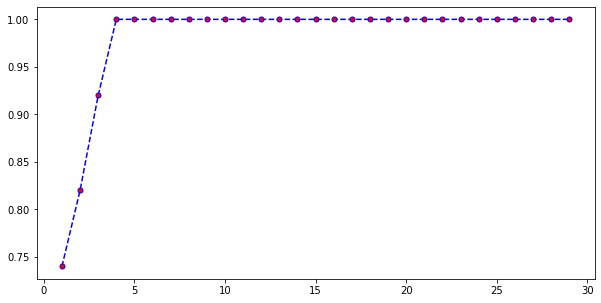

In [20]:
# find the optimal max_depth value using graph 
max_depth = []
for i in range(1,30):
    drugTree = DecisionTreeClassifier(max_depth=i)
    drugTree.fit(X_trainset, y_trainset)
    predTree = drugTree.predict(X_testset)
    max_depth.append(accuracy_score(y_testset, predTree))
plt.figure(figsize=(10,5))
plt.plot(range(1,30),max_depth,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)

In [21]:
# Build DecisionTreeClassifier based on optimal max_depth value 
drugTree2 = DecisionTreeClassifier(max_depth = 5)
drugTree2.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Evaluation 
predTree2 = drugTree2.predict(X_testset)
print(metrics.accuracy_score(y_testset, predTree2))
print(predTree2[0:5])
print(y_testset[0:5])

1.0
['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
[['drugX']
 ['drugY']
 ['drugX']
 ['drugC']
 ['drugY']]


In [23]:
# Cross_validation 
rfc_eval = cross_val_score(estimator = drugTree, X = X_trainset, y = y_trainset, cv = 10)
print('Cross Validation score of Decision Tree Classifier model:', rfc_eval.mean())

Cross Validation score of Decision Tree Classifier model: 0.9866666666666667


## SVM  Algorithm

In [24]:
# create svm object and fit on training subsets
svm_model = SVC().fit(X_trainset, y_trainset)

In [25]:
# try and find the best parameters for 
# the svm model based on the given parameters 
# then fit on training subset
parameters = [{'C': range(1,50), 'kernel': ['linear']},
              {'C': range(1,100), 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV( svm_model,parameters)
grid_search = grid_search.fit(X_trainset, y_trainset)

In [26]:
# best parameters and score based on grid search
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 5, 'kernel': 'linear'}
0.9733333333333334


In [27]:
svm_model = SVC(kernel='linear', C = 5).fit(X_trainset, y_trainset)
svmpred = svm_model.predict(X_testset)

In [28]:
print('Accurcay Score of SVM model:', metrics.accuracy_score(y_testset, svmpred))

Accurcay Score of SVM model: 0.98


In [31]:
# compare different Classifiers Proformance
Classifiers_Proformance = pd.Series({'KNeighborsClassifier': knngs.best_score_, 'DecisionTreeClassifier': rfc_eval.mean(), 
                            'SVM': metrics.accuracy_score(y_testset, svmpred)})

Classifiers_Proformance.sort_values(ascending=False)

DecisionTreeClassifier    0.986667
SVM                       0.980000
KNeighborsClassifier      0.740000
dtype: float64